In [20]:
from pathlib import Path
import matplotlib as mpl

import matplotlib.pyplot as plt
import colorcet  # noqa: F401
from flow_analysis_comps.video_manipulation.control_class import videoControl
from flow_analysis_comps.Classic.extract_velocity import kymoAnalyser

plt.close("all")

%matplotlib widget

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
video_root_folder = Path(r'/Users/simonvanstaalduine/AMOLF-SHIMIZU Dropbox/Simon van Staalduine/001 (1)')
info_file_address = Path(video_root_folder / 'videoInfo.txt')
video_operator = videoControl(video_root_folder, info_file_address)
mean_img = video_operator.mean_img
print(mean_img.shape)

(1504, 2056)


In [22]:
kymographs = video_operator.get_kymographs()

(2, 600, 1797)


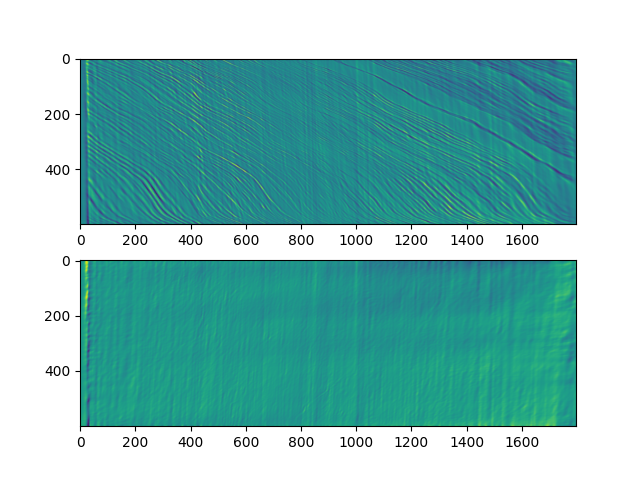

In [19]:
for key, kymo in kymographs.items():
    fig, ax = plt.subplots(2)
    # ax.imshow(kymo)

    analyser = kymoAnalyser(kymo)
    decomposition = analyser.kymograph_decomposed_directions

    ax[0].imshow(analyser.kymograph_decomposed_directions[0])
    ax[1].imshow(analyser.kymograph_decomposed_directions[1])
    result = analyser.process_fourier_images()
    print(result.shape)